# Statistical hypothesis testing

A statistical hypothesis test, sometimes called confirmatory data analysis, is a hypothesis that is testable on the basis of observing a process that is modeled via a set of random variables.

**example:** we can assume the average income of NYC residents is $850,000. This assumption may or may not be true.

**Null hypothesis $H_0$**: A null hypothesis is a precise statement about a population that we **try to reject with sample data**. The hypothesis that there is no significant difference between specified populations, any observed difference being due to sampling or experimental error. **Example:** Sample mean is same as the population mean.

**Alternative hypothesis $H_1$**: Counterpoint to the null hypotesis (**what you hope to prove**). **Example:** Sample mean is not same as the population mean


## Types of Alternative Hypotheses
There are two types of alternative hypotheses: one-sided and two-sided. One-sided alternative hypothesis (a.k.a. directional hypothesis) is used to determine whether the population average differs from the hypothesized value in a specific direction (larger but not smaller than, or vice versa). In contrast, two-sided alternative hypothesis (a.k.a. nondirectional hypothesis) is used to determine whether the population average is either greater than or less than the hypothesized value.

- **One-way test:** Hypotesis test that counts chance results only in one direction.
- **Two-way test:** Hypotsis test that counts chance results in two directions.

<table style="width:60%; text-align:center;">
  <tr>
    <th>Null Hypotesis $H_0$</th>
    <th>One-way $H_1$</th>
    <th>Two-way $H_1$</th>
  </tr>
  <tr>
    <td>$H_0: \mu = k$ </td>
    <td>$H_1: \mu \ne k$</td>
    <td>$H_1:μ>k \text{ or } H_1:μ<k$ </td>
  </tr>
</table>


## Type 1 and Type 2 Errors

In assessing statistical significance, two types of error are possible:

- **Type 1 error**: You mistakenly conclude an effect **is real**, when it is really just due to chance. Rechazar $H_0$ cuando es verdadera.
- **Type 2 error**: You mistakenly conclude that an efect is **not real**, when it really is real. Aceptar $H_0$ cuando es falsa.


## Hypotesis tests and errors
The basic function of significance tests (also called hypotesis tests) is to protect against being fooled by random chance; thus they are typically structured to minimize **Type 1** errors.
 


## Statistical Significance and P-Values

**p-value**: A p-value is the probability that the results from your sample data occurred by chance. Range from `[0.0-1.0]`

Low p-values are good; They indicate your data did not occur by chance.  We hope for a low value, so we can conclude that we've proved something.

<img src="images/P-value_Graph.png"/>



In [11]:
checkPValue = lambda p,threshold=0.05: "--> Null(H0) hypotesis rejected" if p < threshold else "--> We cannot reject the null hypotesis"


# Significance tests

## Student's t-test

Tests for a Student’s t-distribution. In a normally distributed population where standard deviation in unknown and sample size is comparatively small. 

Is used to compare the mean of two given samples.

The t-test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance.

- A large t-score tells you that the groups are different.
- A small t-score tells you that the groups are similar.


### Types of t-test

There are three main types:

1. An **Independent Samples** t-test compares the means for two groups.
2. A **Paired sample** t-test compares means from the same group at different times (say, one year apart).
3. A **One sample** t-test tests the mean of a single group against a known mean.

When you run a hypothesis test, you use the T statistic with a p value. The p-value tells you what the odds are that your results could have happened by chance. 

### Example: test outcome, the p-value

Let’s say you and a group of friends score an average of 205 on a bowling game.

You know the average bowler scores is 79.7. Should you and your friends consider professional bowling? Or are those scores a fluke? 

Finding the t statistic and the probability value will give you a good idea. More technically, finding those values will give you evidence of a significant difference between your team’s mean and the population mean (i.e. everyone).

The greater the T, the more evidence you have that your team’s scores are significantly different from average.

A smaller T value is evidence that your team’s score is not significantly different from average. 

It’s pretty obvious that your team’s score (205) is significantly different from 79.7, so you’d want to take a look at the probability value. **If the p-value is larger than 5%**, the odds are your team getting those scores are due to chance. Very small (under 5%), you’re onto something: think about going professional.



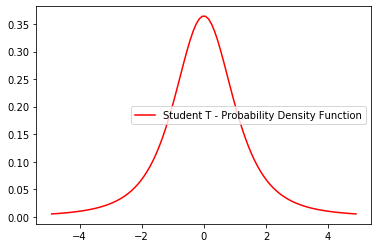

In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt

# Calculate a few first moments
df = 2.74335149908
mean, var, skew, kurt = t.stats(df, moments='mvsk')

# Display the probability density function (pdf)
x = np.linspace(t.ppf(0.01, df),t.ppf(0.99, df), 100)
plt.plot(x, t.pdf(x, df),'r-')
plt.legend(["Student T - Probability Density Function"])

### One-sample T-Test

$${\displaystyle t={\frac {Z}{s}}={\frac {{\bar {X}}-\mu }{\frac{\widehat {\sigma }}{{\sqrt {n}}}}}}$$

where:
- $n$ is the sample size
- $\bar{X}$ is the sample mean from a sample `X1, X2, …, Xn` of size $n$, 
- $s$ is the standard error of the mean
- $\widehat {\sigma }$ is the estimate of the standard deviation of the population
- $μ$ is the population mean.


**Note:** Most test statistics have the form $t = \frac{Z}{s'}$ where Z and s are functions of the data.


In [12]:
from scipy import stats

np.random.seed(7654567)  # fix seed to get the same result
rvs = stats.norm.rvs(loc=5, scale=10, size=(50,2))


# Test if mean of random sample is equal to true mean, and different mean. 
# We don’t reject it in the first case and reject the null hypothesis in the second one.

resA = stats.ttest_1samp(rvs,5.0)
print(resA)
print(checkPValue(resA.pvalue[0]))

resB = stats.ttest_1samp(rvs,0.0)
print(resB)
print(checkPValue(resB.pvalue[0]))


Ttest_1sampResult(statistic=array([-0.68014479, -0.04323899]), pvalue=array([0.49961383, 0.96568674]))
--> We cannot reject the null hypotesis
Ttest_1sampResult(statistic=array([2.77025808, 4.11038784]), pvalue=array([0.00789095, 0.00014999]))
--> Null(H0) hypotesis rejected


### Paired sample T-test (dependent)
This test is used when the samples are dependent; that is, when there is only one sample that has been tested twice (repeated measures) or when there are two samples that have been matched or "paired". This is an example of a paired difference test. The t statistic is calculated as:

$${\displaystyle t={\frac {{\bar {X}}_{D}-\mu _{0}}{s_{D}/{\sqrt {n}}}}}$$

where:
- $\bar{X_D}$ average of the differences between all pairs.
- $\bar{s_D}$ standard deviation of the differences between all pairs

Note: An example of paired dependent variables is scores of the **same set of student in different exams**


In [16]:
from scipy import stats
np.random.seed(12345678) # fix random seed to get same numbers

rvs1 = stats.norm.rvs(loc=5,scale=10,size=500)
rvs2 = (stats.norm.rvs(loc=5,scale=10,size=500) +
        stats.norm.rvs(scale=0.2,size=500))
res = stats.ttest_rel(rvs1,rvs2)
print(res)
print(checkPValue(res.pvalue))


rvs3 = (stats.norm.rvs(loc=8,scale=10,size=500) +
        stats.norm.rvs(scale=0.2,size=500))
res = stats.ttest_rel(rvs1,rvs3)
print(res)
print(checkPValue(res.pvalue))


Ttest_relResult(statistic=0.24101764965300979, pvalue=0.8096404344581155)
--> We cannot reject the null hypotesis
Ttest_relResult(statistic=-3.9995108708727924, pvalue=7.308240219166128e-05)
--> Null(H0) hypotesis rejected


## Another example, this time without `scipy``

In [33]:
import numpy as np
from scipy import stats

# Define 2 normal random distributions (A,B). Get 10 samples out of each one
N = 10

a = np.random.randn(N) + 2 # with mean=2 and var=1
b = np.random.randn(N) # with mean=1 and var=1


# For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
# In standard statistical practice, ddof=1 provides an unbiased estimator of the variance of a hypothetical
# infinite population

# Calculate the variance to get the standard deviation
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
print(var_a, var_b)

1.0955096668006201 1.5510211366115658


In [34]:
#std deviation
s = np.sqrt((var_a + var_b)/2)

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value, Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
p = 2*(1 - stats.t.cdf(t,df=df))

# You can see that after comparing the t statistic with the critical t value (computed internally)
# we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that 
# the mean of the two distributions are different and statistically significant.
print(f"t={t} p={p}")
checkPValue(p)

t=4.435696470027005 p=0.0003192497830990515


'Null(H0) hypotesis rejected'

In [36]:
# Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print(f"t={t} p={p}")
checkPValue(p)

t=4.435696470027005 p=0.0003192497830990515


'Null(H0) hypotesis rejected'

## Resources & references
- https://en.wikipedia.org/wiki/Student%27s_t-test
- https://www.statisticshowto.datasciencecentral.com/t-statistic/
- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/
- http://www.ttable.org/z-score-table.html
- https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/t-score-vs-z-score/
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/One-Sample_T-Test.pdf